In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

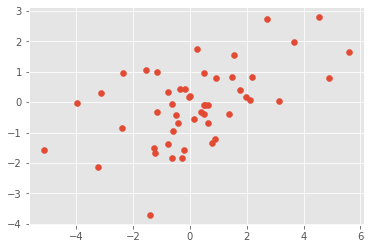

In [2]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3, 1], [1, 2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [8]:
v, W_true = np.linalg.eig(C)
v # Out: array([3.61803399, 1.38196601])
W_true

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [6]:
np.dot(W_true, W_true.T)

array([[1., 0.],
       [0., 1.]])

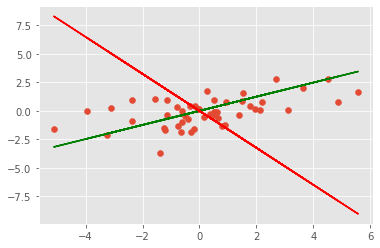

In [14]:
plt.scatter(data[:, 0], data[:, 1])
# побудуємо справжні компоненти, вздовж яких максимальна дисперсія даних
plt.plot(data[:, 0], (W_true[1, 0] / W_true[1, 1]) * data[:, 0], color="g") # Вектор 1 
plt.plot(data[:, 0], (W_true[0, 0] / W_true[0, 1]) * data[:, 0], color="r") # Вектор 0

Напишіть функцію get_pc﻿, яка отримує на вхід dataframe з довільним числом кількісних змінних. Функція повинна виконувати аналіз головних компонентів та додавати у вихідні дані дві нові колонки зі значеннями першої та другої головної компоненти. Нові змінні мають називатися "PC1" та "PC2" відповідно.

In [1]:
from sklearn.decomposition import PCA

import pandas as pd
pca = PCA(n_components=2)

def get_pc(df):
    return df.assign(pc1=pca.fit_transform(df)[:, 0], 
           pc2=pca.fit_transform(df)[:, 1])

df = pd.read_csv("https://stepic.org/media/attachments/course/524/pca_test.csv")
get_pc(df)

,V1,V2,V3,V4,V5,pc1,pc2
0,13,15,12,13,12,-4.500822,-2.364595
1,16,11,8,12,6,3.039182,1.929687
2,15,7,10,12,13,-2.752467,5.076265
3,12,11,6,6,4,7.837194,-1.688535
4,11,13,13,10,12,-3.623088,-2.952822


Усложним предыдущую задачу! Напишите функцию get_pca2, которая принимает на вход dataframe с произвольным числом количественных переменных. Функция должна рассчитать, какое минимальное число главных компонент объясняет больше 90% изменчивости в исходных данных и добавлять значения этих компонент в исходный dataframe в виде новых переменных.

Рассмотрим работу функции на примере встроенных данных swiss:
https://stepik.org/lesson/26672/step/4?unit=8484

In [32]:
import pandas as pd

import numpy as np
from IPython.core.display import display, HTML

from sklearn.decomposition import PCA
pd.options.display.max_columns = None
def get_pca2(df, threshold=0.9):
    pca = PCA(n_components=df.shape[1])
    fit = pca.fit_transform(df)
    n_components = sum(np.cumsum(pca.explained_variance_ratio_) < threshold) + 1
    return pd.concat([df, pd.DataFrame(fit[:, :n_components])], axis=0, ignore_index=True)
swiss = pd.read_csv('https://r-data.pmagunia.com/system/files/datasets/dataset-48809.csv')
d = get_pca2(swiss)
d

C:\Users\GbreH\AppData\Local\Temp\ipykernel_6772\2441791185.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,0,1
0,80.2,17.0,15.0,12.0,9.96,22.2,NaN,NaN
1,83.1,45.1,6.0,9.0,84.84,22.2,NaN,NaN
2,92.5,39.7,5.0,5.0,93.40,20.2,NaN,NaN
3,85.8,36.5,12.0,7.0,33.77,20.3,NaN,NaN
4,76.9,43.5,17.0,15.0,5.16,20.6,NaN,NaN
...,...,...,...,...,...,...,...,...
89,NaN,NaN,NaN,NaN,NaN,NaN,-36.020078,-3.162487
90,NaN,NaN,NaN,NaN,NaN,NaN,-40.627884,17.461472
91,NaN,NaN,NaN,NaN,NaN,NaN,-23.301944,65.052918
92,NaN,NaN,NaN,NaN,NaN,NaN,2.605495,15.841822


In [31]:
def force_show_all(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(HTML(df.to_html()))

# ... now when you're ready to fully display df:
force_show_all(d)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,0,1
0,80.2,17.0,15.0,12.0,9.96,22.2,NaN,NaN
1,83.1,45.1,6.0,9.0,84.84,22.2,NaN,NaN
2,92.5,39.7,5.0,5.0,93.40,20.2,NaN,NaN
3,85.8,36.5,12.0,7.0,33.77,20.3,NaN,NaN
4,76.9,43.5,17.0,15.0,5.16,20.6,NaN,NaN
5,76.1,35.3,9.0,7.0,90.57,26.6,NaN,NaN
6,83.8,70.2,16.0,7.0,92.85,23.6,NaN,NaN
7,92.4,67.8,14.0,8.0,97.16,24.9,NaN,NaN
8,82.4,53.3,12.0,7.0,97.67,21.0,NaN,NaN
9,82.9,45.2,16.0,13.0,91.38,24.4,NaN,NaN
